# Oscilador harmonico amortecido utilizado o método de verlet

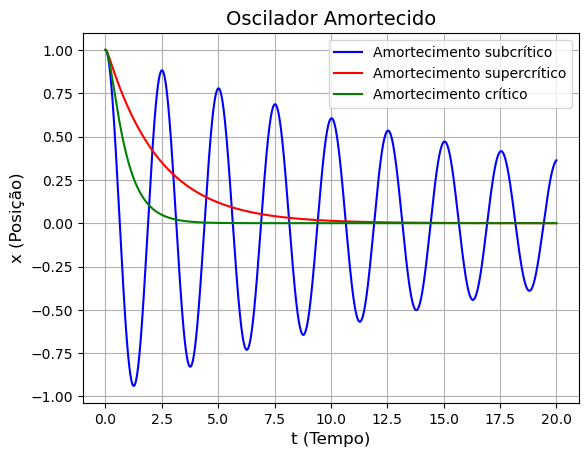

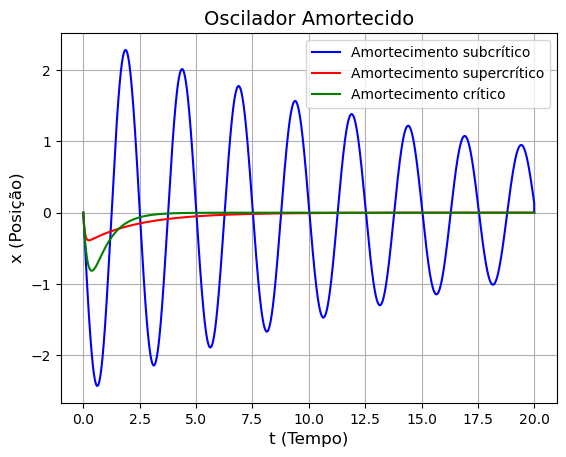

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class OsciladorAmortecido():
    def __init__(self, b, v0, x0):
        self.b = b  # parâmetro de amortecimento
        self.v0 = v0
        self.x0 = x0

    def oscilador_amortecido(self, x, v):
        omega_quadrado = 2 * np.pi
        return -omega_quadrado * x - self.b * v

    def solver_verlet(self, h=0.001, tempo_total=20):
        t = np.arange(0, tempo_total, h)
        x = np.zeros_like(t)
        v = np.zeros_like(t)

        x[0] = self.x0
        v[0] = self.v0

        # Primeiro passo para inicializar o Verlet
        aceleracao = self.oscilador_amortecido(x[0], v[0])
        x[1] = x[0] + h * v[0] + 0.5 * h**2 * aceleracao

        for i in range(1, len(t) - 1):
            a = self.oscilador_amortecido(x[i], v[i-1])  # usa a velocidade anterior
            x[i+1] = 2*x[i] - x[i-1] + h**2 * a
            v[i] = (x[i+1] - x[i-1]) / (2*h)
        return t, x, v

solucao1 = OsciladorAmortecido(0.1, 0, 1)
t, x1, v1 = solucao1.solver_verlet()

solucao2 = OsciladorAmortecido(15, 0, 1)
t, x2, v2 = solucao2.solver_verlet()

solucao3 = OsciladorAmortecido(6, 0, 1)
t, x3, v3 = solucao3.solver_verlet()


plt.plot(t, x1, color='blue', label='Amortecimento subcrítico')
plt.plot(t, x2, color='red', label='Amortecimento supercrítico')
plt.plot(t, x3, color='green', label='Amortecimento crítico')
plt.title('Oscilador Amortecido', fontsize=14)
plt.xlabel('t (Tempo)', fontsize=12)
plt.ylabel('x (Posição)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


plt.plot(t, v1, color='blue', label='Amortecimento subcrítico')
plt.plot(t, v2, color='red', label='Amortecimento supercrítico')
plt.plot(t, v3, color='green', label='Amortecimento crítico')
plt.title('Oscilador Amortecido', fontsize=14)
plt.xlabel('t (Tempo)', fontsize=12)
plt.ylabel('x (Posição)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

